<a href="https://colab.research.google.com/github/lucasBertola/Minigrid/blob/main/exemples/PPO_MlpPolicy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium-minigrid==0.0.4 stable-baselines3==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 43.5 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.0
    Uninstalling pygame-2.5.0:
      Successfully uninstalled pygame-2.5.0


In [15]:
from gymnasium_minigrid import MiniGridEnv
from stable_baselines3 import PPO

size=5
env = MiniGridEnv(size=size,output_is_picture=False)
model = PPO("MlpPolicy", env, verbose=1)

model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 64       |
|    ep_rew_mean     | 313      |
| time/              |          |
|    fps             | 818      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 43.1        |
|    ep_rew_mean          | 384         |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011768567 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss   

## SAVE SIMULATION AS GIF

In [17]:
!pip install imageio
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00


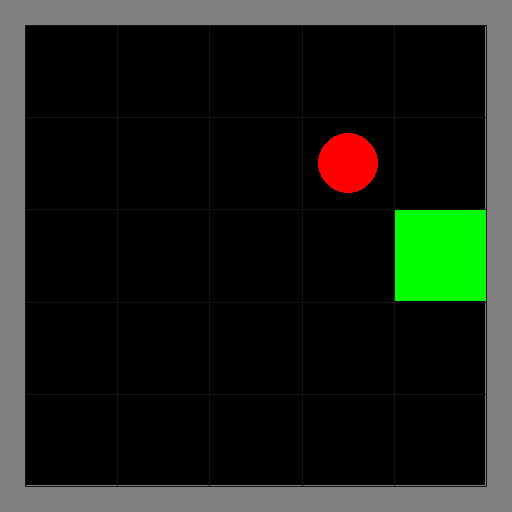

In [20]:
import imageio
from IPython import display

env = MiniGridEnv(render_mode="rgb_array",size=size,output_is_picture=False)

images = []

obs, _ = env.reset()

for i in range(1000):
    action, _ = model.predict(obs)
    obs, rewards, dones, truncated, info = env.step(action)
    image = env.render()
    images.append(image)
    if(truncated or dones):
        obs , _=  env.reset()


imageio.mimsave('simulation.gif', images)

# Afficher la GIF dans Colab
display.Image("simulation.gif")